In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('diabetes.csv')

# Data Exploration and Prepration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
import plotly.graph_objects as go

In [5]:
colors = ['gold', 'mediumturquoise']
labels = ['0','1']
values = df['Outcome'].value_counts()/df['Outcome'].shape[0]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Outcome")
fig.show()

# Handling Missing Values

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The dataset contains no null values 

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
plt.rcParams.update({'font.size':7,
                    'boxplot.flierprops.markersize':2})

# Detecting Outliers

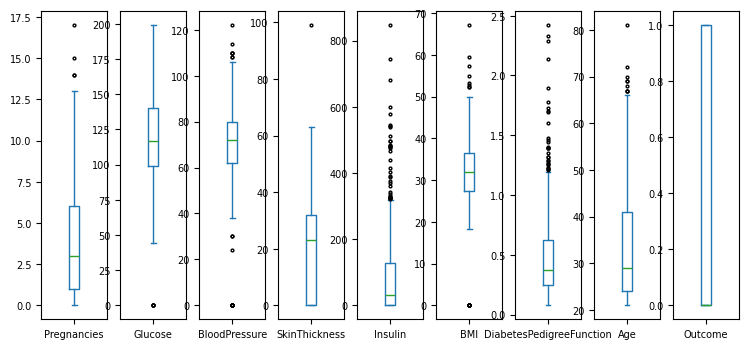

In [10]:
df.plot(kind='box', subplots=True, sharex=False , sharey=False, figsize=(9, 4))
plt.show()

In [11]:
# Calculate Q1 and Q3
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
upper_limit= Q3+IQR*2
lower_limit= Q1-IQR*2

# Display outliers for all columns
df=df.loc[(df['SkinThickness']<= upper_limit) & (df['SkinThickness']>= lower_limit)]

In [12]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR = Q3 - Q1
upper_limit=Q3+IQR*2
lower_limit=Q1-IQR*2
df= df.loc[(df['Age']<=upper_limit) & (df['Age']>=lower_limit)]

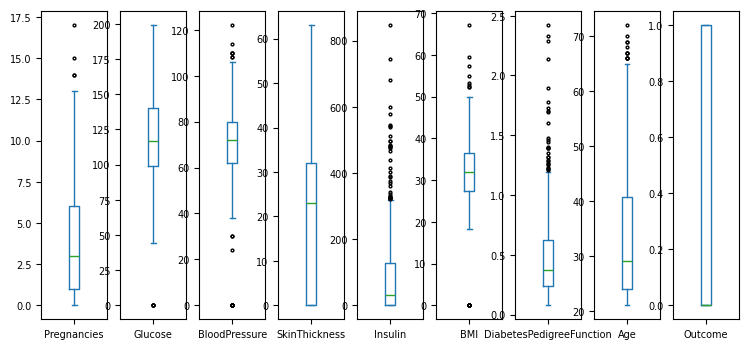

In [13]:
df.plot(kind='box', subplots=True, sharex=False , sharey=False, figsize=(9, 4))
plt.show()

# Correlation between Features

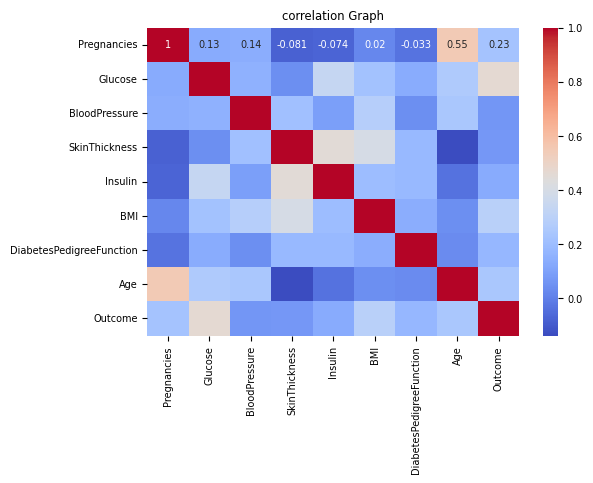

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")
plt.title ("correlation Graph")
plt.show()

There is no strong correlation between the features themselves.

In [15]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   766.000000  766.000000     766.000000     766.000000  766.000000   
mean      3.840731  120.778068      69.097911      20.417755   79.929504   
std       3.368165   31.892185      19.380256      15.712212  115.356182   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.000000      80.000000      32.000000  127.750000   
max      17.000000  199.000000     122.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  766.000000                766.000000  766.000000  766.000000  
mean    31.996997                  0.471757   33.140992    0.348564  
std      7.890778                  0.331740   11.601373    0.476827  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243250   24.000000    0.000000  
50%     32.000000                  0.370500   29.000000    0.000000  
75%     36.600000                  0.626750   40.750000    1.000000  
max     67.100000                  2.420000   72.000000    1.000000

# EDA

In [16]:
sns.set()

<Figure size 1000x800 with 0 Axes>

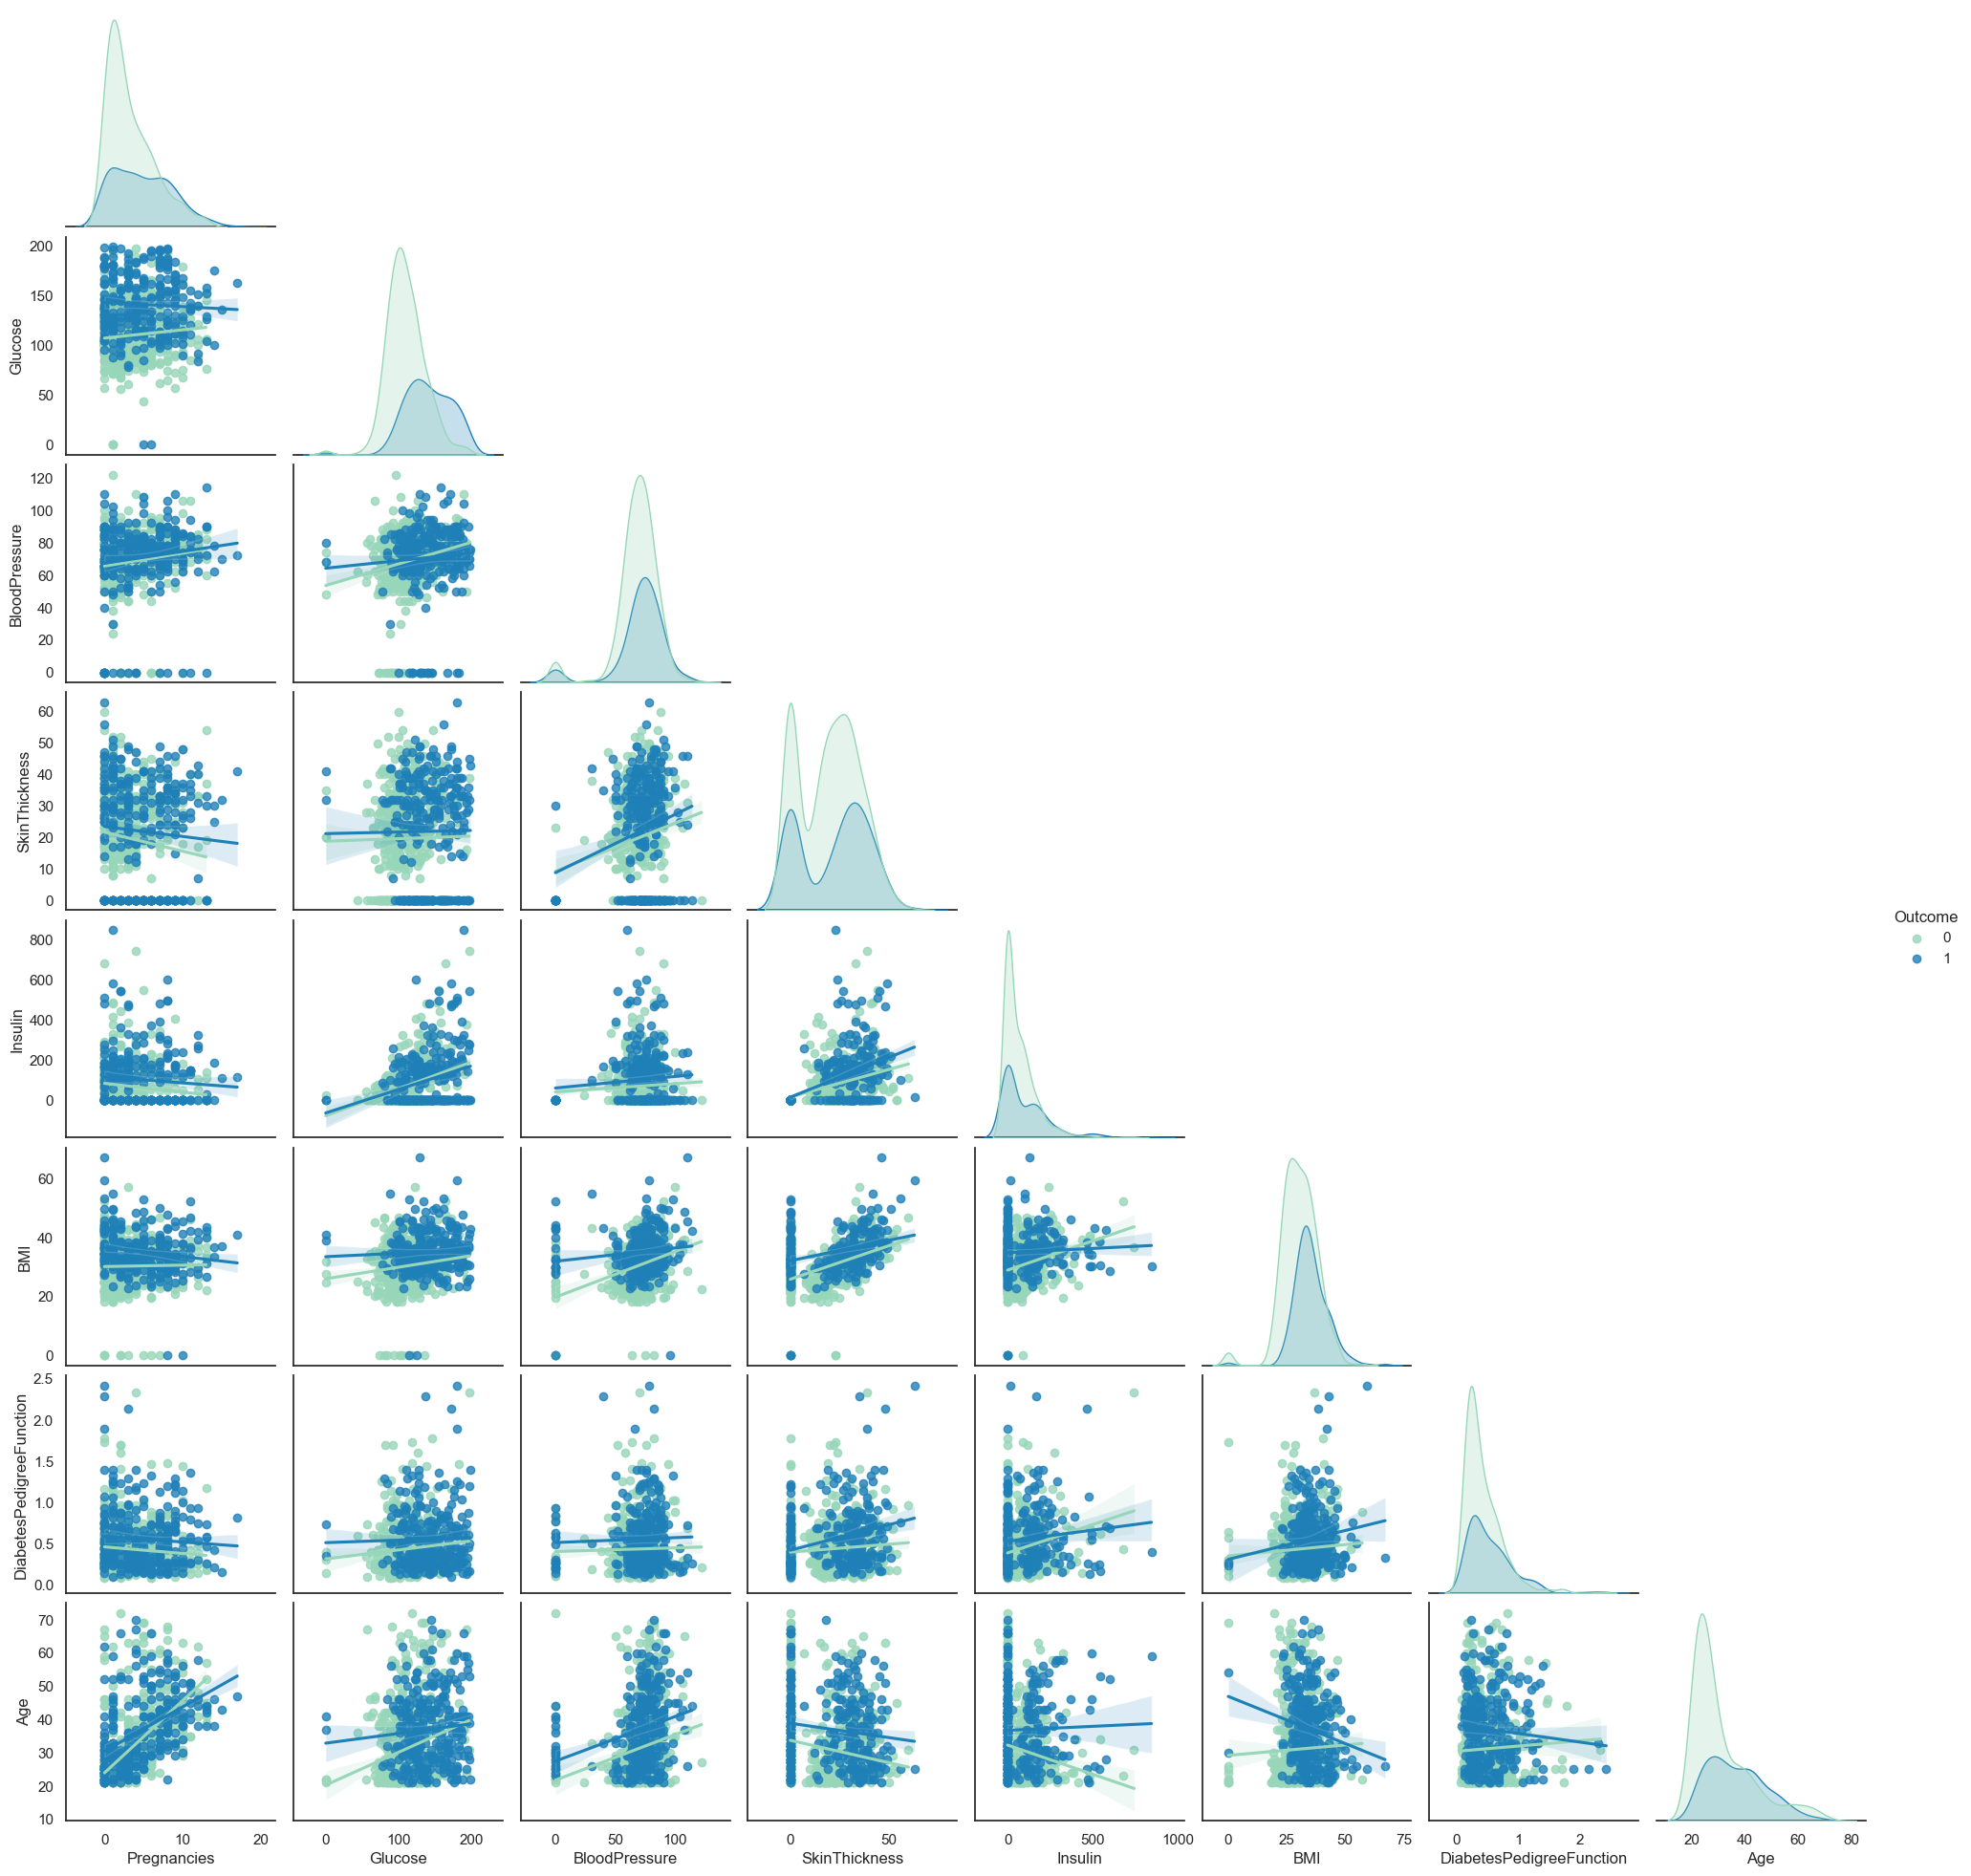

In [17]:
plt.figure(figsize=(10, 8))
sns.set_style("white")
sns.set_palette("bright")
sns.pairplot(df, kind = 'reg', corner = True, palette ='YlGnBu', hue='Outcome' )
plt.show()

Younger age groups: In some cases, younger people may have a lower risk of the outcome diabetes.
Older age groups: Older individuals may have a higher risk or higher occurrence of the outcome.

# Average BMI for people with and without diabetes

In [18]:
# Group by Outcome and calculate mean BMI
bmi_avg = df.groupby('Outcome')['BMI'].mean()
print(bmi_avg)

Outcome
0    30.313026
1    35.144195
Name: BMI, dtype: float64


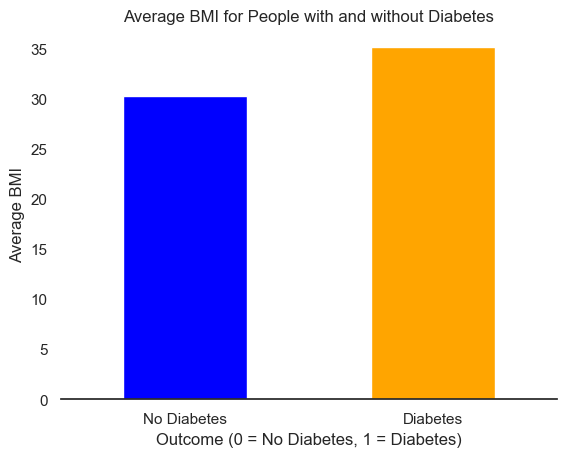

In [19]:
# Plotting the average BMI for each outcome group
bmi_avg.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average BMI for People with and without Diabetes')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Average BMI')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)
sns.despine(left=True)
plt.show()

The graph shows a trend of higher BMI in people with diabetes (Outcome 1), which could indicate a link between obesity and diabetes.

In [21]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filter data for high BMI (BMI > 30)
high_bmi_age_group = df[df['BMI'] > 30].groupby('Age_Group').size()

# Show the count of people with high BMI in each age group
print(high_bmi_age_group)

Age_Group
0-20       0
21-30    223
31-40    103
41-50     92
51-60     33
61-70     12
71-80      1
81+        0
dtype: int64


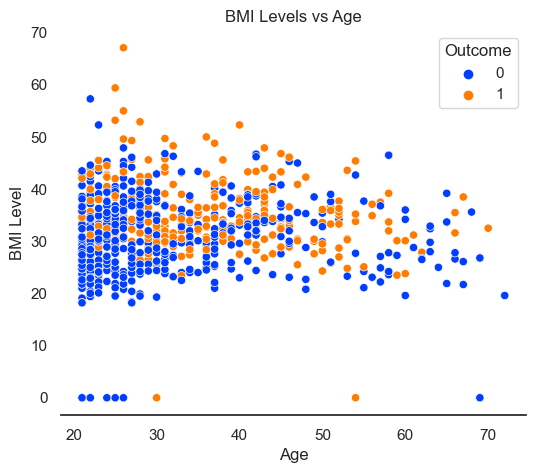

In [37]:
# Scatter plot for BMI level (y-axis) and Age (x-axis)
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Age', y='BMI', data=df, color='blue', hue='Outcome')
plt.title('BMI Levels vs Age')
plt.xlabel('Age')
plt.ylabel('BMI Level')
sns.despine(left=True)
plt.show()

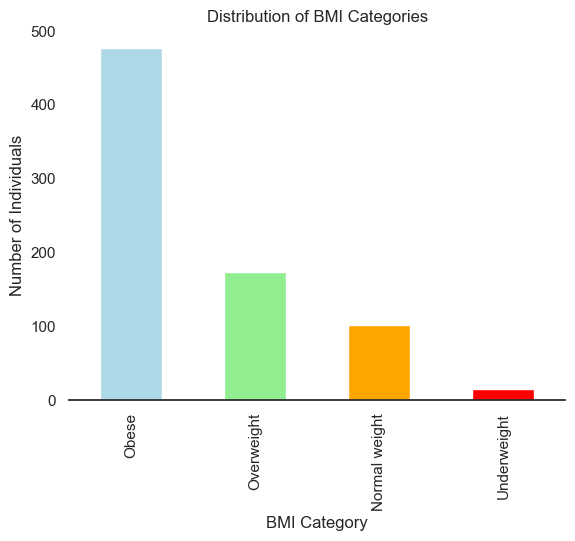

In [23]:
# Categorizing BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

# Apply categorization
df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

# Plotting the distribution of BMI categories
bmi_category_counts = df['BMI_Category'].value_counts()
bmi_category_counts.plot(kind='bar', color=['lightblue', 'lightgreen', 'orange', 'red'])
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Number of Individuals')
sns.despine(left=True)
plt.show()

 by comparing the average BMI for both groups, you can see if being overweight or obese is linked to a higher chance of having diabetes.

# Number of diabetes cases by age Group

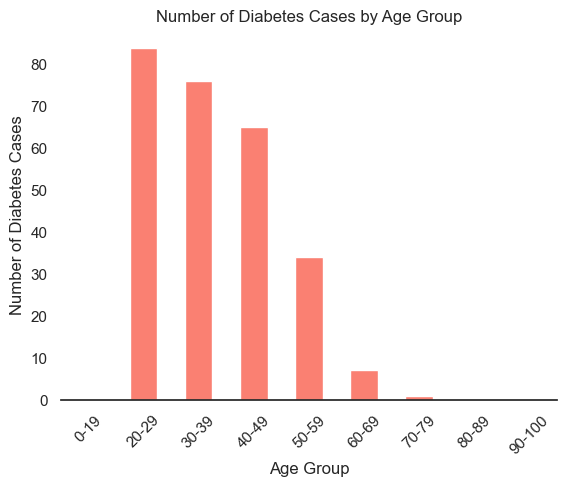

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Create age groups (e.g., 20-30, 30-40, etc.)
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Add a new column 'Age_Group'
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filter the data to get the count of diabetes cases (Outcome=1) for each age group
age_group_diabetes = df[df['Outcome'] == 1].groupby('Age_Group').size()

# Plotting the number of diabetes cases per age group
age_group_diabetes.plot(kind='bar', color='salmon')
plt.title('Number of Diabetes Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Diabetes Cases')
plt.xticks(rotation=45)
sns.despine(left=True)
plt.show()

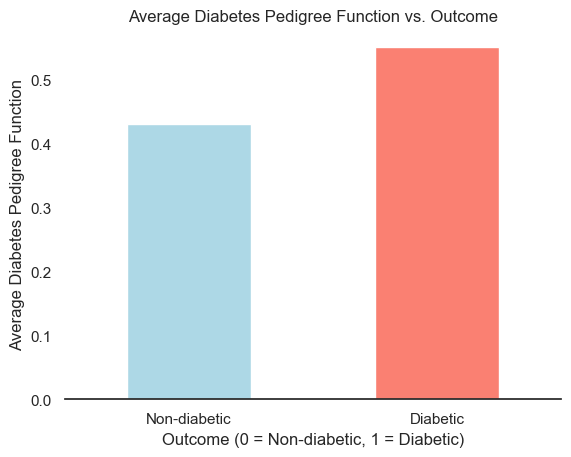

In [25]:
# Group by Outcome and calculate average Diabetes Pedigree Function
pedigree_vs_outcome = df.groupby('Outcome')['DiabetesPedigreeFunction'].mean()

# Plotting the results
pedigree_vs_outcome.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Average Diabetes Pedigree Function vs. Outcome')
plt.xlabel('Outcome (0 = Non-diabetic, 1 = Diabetic)')
plt.ylabel('Average Diabetes Pedigree Function')
plt.xticks([0, 1], ['Non-diabetic', 'Diabetic'], rotation=0)
sns.despine(left=True)
plt.show()


# used Decision Tree Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [39]:
# Prepare the data (features and target)
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age']]  # Features
y = df['Outcome']  # Target

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [40]:
# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73       147
           1       0.53      0.59      0.56        83

    accuracy                           0.67       230
   macro avg       0.64      0.65      0.64       230
weighted avg       0.67      0.67      0.67       230



In [41]:
# feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their importance values
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importance_df)


                    Feature  Importance
1                   Glucose    0.362251
5                       BMI    0.178568
6  DiabetesPedigreeFunction    0.115186
2             BloodPressure    0.101012
7                       Age    0.100496
0               Pregnancies    0.061569
3             SkinThickness    0.042141
4                   Insulin    0.038778


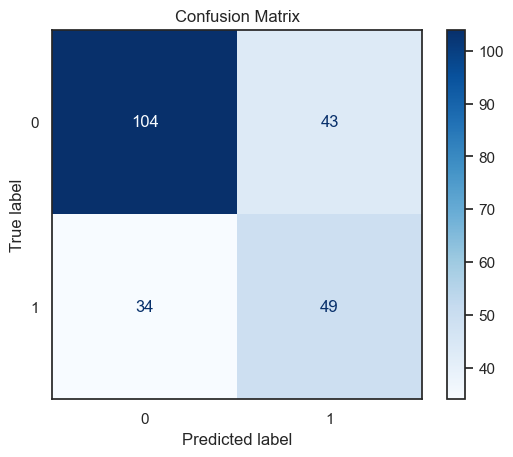

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()